In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = "../output_videos/cropped_image.jpg" # Đường dẫn ảnh cần phân cụm
image = cv2.imread(image_path) # Đọc ảnh
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Chuyển ảnh sang RGB

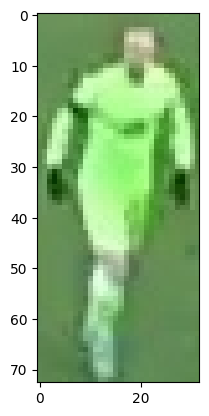

In [5]:
plt.imshow(image) # Hiển thị ảnh
plt.show() # Hiển thị ảnh

# Take the top half of the image

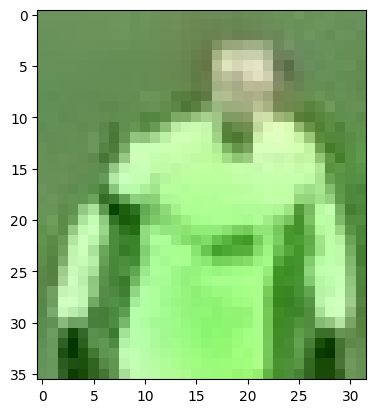

In [6]:
top_half_image = image[0: int(image.shape[0]/2), :] # Lấy nửa trên của ảnh
plt.imshow(top_half_image) # Hiển thị ảnh

# Cluster the image into two clusters

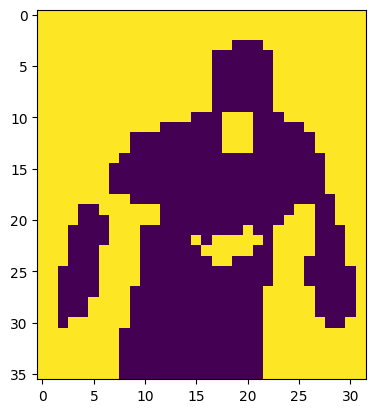

In [9]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3) # -1 là số hàng, 3 là số cột

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0) # cắt ảnh thành 2 phần
kmeans.fit(image_2d) # fit ảnh vào model

# get the cluster labels
labels = kmeans.labels_ # lấy ra nhãn của ảnh

# reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1]) # reshape lại ảnh

# Display the clustered image
plt.imshow(clustered_image) # Hiển thị ảnh
plt.show() # Hiển thị ảnh

In [10]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]] # Lấy ra 4 góc của ảnh
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count) # Lấy ra nhãn xuất hiện nhiều nhất trong 4 góc
print(non_player_cluster) # In ra nhãn

1


In [11]:
player_cluster = 1 - non_player_cluster # Nhãn của người chơi
print(player_cluster) # In ra nhãn người chơi

0


In [12]:
kmeans.cluster_centers_[player_cluster] # Lấy ra tọa độ màu của người chơi, có thể check mã rgb color codes chart

array([172.88935282, 238.16492693, 147.92275574])